In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('D:/workspace/MachineLearning/machine-learning-practice/Datasets/homeprices.csv')

In [4]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### to fill NaN values, we can use median of bedrooms

In [5]:
df.isnull()

,area,bedrooms,age,price
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False


In [6]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

In [7]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [8]:
reg = LinearRegression()

In [9]:
X = df.drop('price', axis=1)
X

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [10]:
y = df['price']
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [11]:
reg.fit(X, y)

LinearRegression()

### price(dependent) = m1 * area + m2 * bedrooms + m3 * age + c(intercept)

In [12]:
reg.coef_, reg.intercept_

(array([  112.06244194, 23388.88007794, -3231.71790863]), 221323.0018654043)

In [13]:
reg.predict([[3000, 3., 40], [2500, 4., 5]])

D:\workspace\venvs\jupyter_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031, 578876.03748933])

# Exercise

In [14]:
df = pd.read_csv('D:/workspace/MachineLearning/machine-learning-practice/Datasets/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


<Axes: >

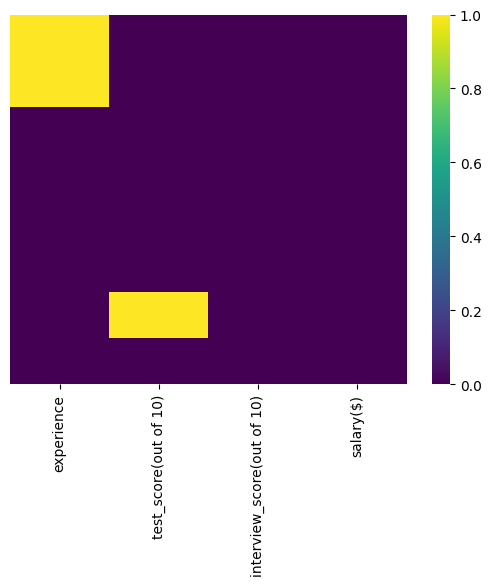

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [16]:
median_test_score = df['test_score(out of 10)'].median()
median_test_score

8.0

In [17]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


### to convert word to number, use python word2number library

In [18]:
from word2number import w2n

In [19]:
df['experience'] = df['experience'].fillna('0')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [23]:
df['experience'] = df['experience'].apply(w2n.word_to_num)

In [24]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


## Linear Regression

In [25]:
reg = LinearRegression()

In [27]:
X = df.drop('salary($)', axis=1)
X

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,8.0,7
7,11,7.0,8


In [29]:
y = df['salary($)']
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [30]:
reg.fit(X, y)

LinearRegression()

In [31]:
reg.coef_, reg.intercept_

(array([2812.95487627, 1845.70596798, 2205.24017467]), 17737.263464337688)

In [32]:
reg.predict([[2, 9, 6]])

D:\workspace\venvs\jupyter_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [33]:
reg.predict([[12, 10, 10]])

D:\workspace\venvs\jupyter_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])